In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/daily-total-female-births-CA.csv", header=0, parse_dates=[0])

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.dtypes

date      datetime64[ns]
births             int64
dtype: object

In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [6]:
df.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [7]:
df['lag1'] = df.births.shift(1)
df['lag2'] = df.births.shift(365)

In [8]:
df.tail()

,date,births,year,month,day,lag1,lag2
360,1959-12-27,37,1959,12,27,34.0,NaN
361,1959-12-28,52,1959,12,28,37.0,NaN
362,1959-12-29,48,1959,12,29,52.0,NaN
363,1959-12-30,55,1959,12,30,48.0,NaN
364,1959-12-31,50,1959,12,31,55.0,NaN


In [9]:
df.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [37]:
df['roll_mean'] = df.births.rolling(window=2).mean()
df['roll_max'] = df.births.rolling(window=3).max()

In [54]:
df['expand_max'] = df.births.expanding().max()

In [55]:
df.head(10)

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


In [2]:
import pandas as pd

In [43]:
df = pd.read_csv("../Data/daily-total-female-births-CA.csv", header=0 , parse_dates=[0])

<AxesSubplot: >

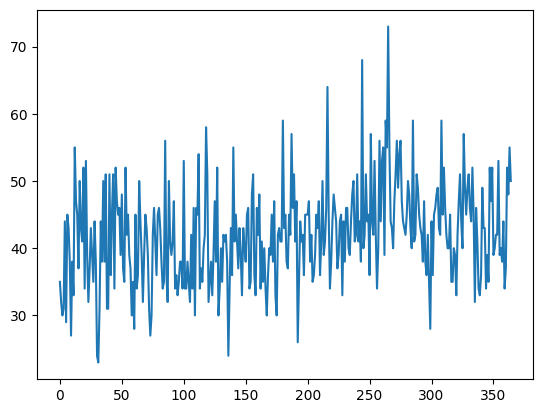

In [7]:
df.births.plot()

In [8]:
df.index = df.date

<AxesSubplot: xlabel='date'>

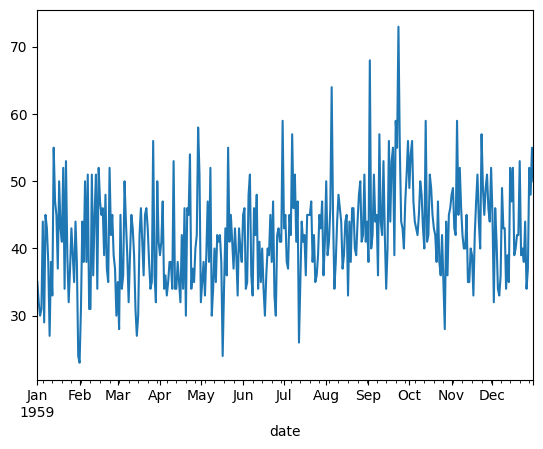

In [9]:
df.births.plot()

In [21]:
jan_df = df[(df.date >= "1959-01-01") & (df.date <= "1959-01-10")]

In [22]:
df.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


<AxesSubplot: xlabel='date'>

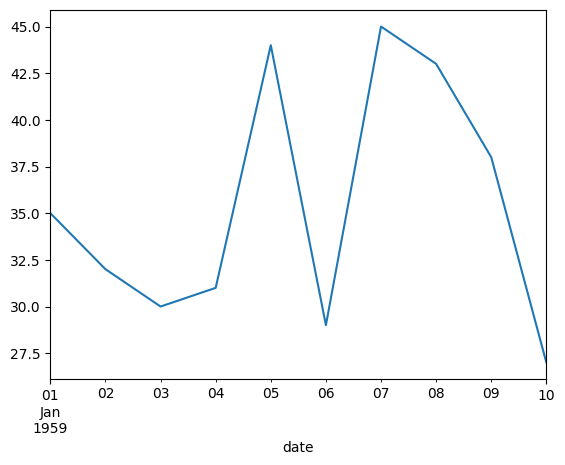

In [23]:
jan_df.births.plot()

<AxesSubplot: ylabel='births'>

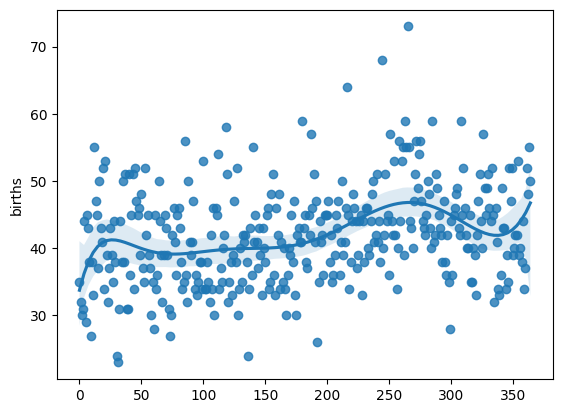

In [47]:
import seaborn as sns
sns.regplot(x=df.index.values , y=df.births , order=10)